# Lego Pieces Analysis


In [ ]:
<img src="bricks.jpg">

# import statement

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df_colors = pd.read_csv(r"colors.csv")

In [18]:
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [20]:
df_colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

name column has 135 unique colors

In [24]:
df_colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


number of tranparent color is 28 and opaque is 28

# Understanding Lego themes vs Lego sets


<img src="lego_themes.png">

<img src="lego_sets.png">

In [48]:
df_sets = pd.read_csv(r"sets.csv")

In [49]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [50]:
df_sets.year.sort_values(ascending=True)

9521     1949
9534     1949
9539     1949
9544     1949
9545     1949
         ... 
11289    2020
5147     2020
11337    2021
11335    2021
11334    2021
Name: year, Length: 15710, dtype: int64

In [51]:
df_sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In "1949" the first lego sets released and the lego set is called "Extra-Large Gift Set"

In [57]:
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Back in 1949, LEGO got started selling only 5 different sets! 

In [59]:
df_sets.sort_values('num_parts',ascending=False).head(1)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987


The largest LEGO set ever produced has around 10,000 pieces!

In [70]:
sets_by_year = df_sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [72]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

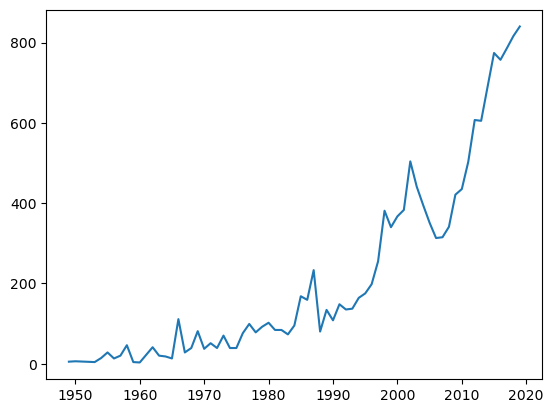

In [75]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [78]:
themes_by_years = df_sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_years.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [79]:
themes_by_years.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


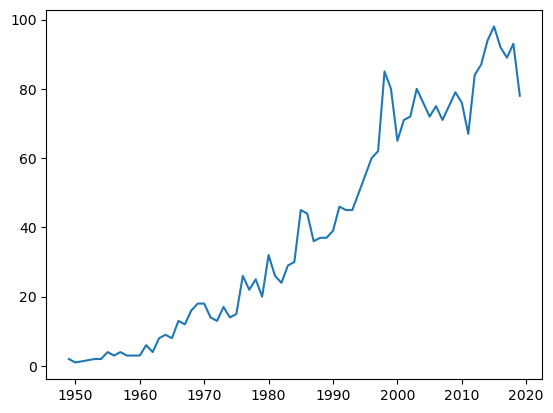

In [80]:
plt.plot(themes_by_years.index[:-2], themes_by_years.theme_id[:-2])

# we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010

Text(0, 0.5, 'theme_number')

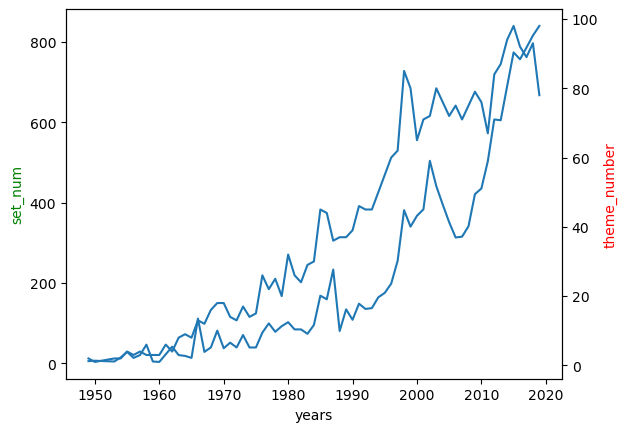

In [92]:
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(themes_by_years.index[:-2], themes_by_years.theme_id[:-2])

ax1.set_xlabel('years')
ax1.set_ylabel('set_num',color='green')
ax2.set_ylabel('theme_number',color='red')

In [104]:
parts_per_set = df_sets.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.rename(columns={'num_parts':'avg_parts'},inplace=True)
parts_per_set.head()

,avg_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [105]:
parts_per_set.tail()

,avg_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


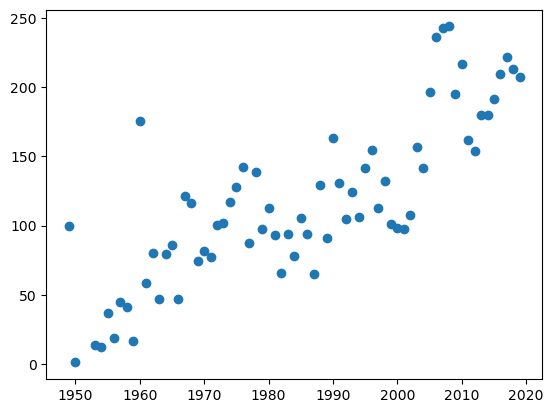

In [106]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.avg_parts[:-2])

# we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

# database schema:

<img src="rebrickable_schema.png">

note:such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

In [109]:
df_themes = pd.read_csv(r"themes.csv")

In [110]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [115]:
df_themes.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [114]:
df_themes[df_themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [118]:
df_sets[df_sets.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [120]:
df_sets[df_sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


# Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters 

In [121]:
set_theme_count = df_sets['theme_id'].value_counts()

In [122]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [125]:
merged_df = pd.merge(set_theme_count, df_themes, on='id')

merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


Star Wars is indeed the theme with the most LEGO sets.

# 

# Let's plot the top 10 themes on a chart.

<BarContainer object of 10 artists>

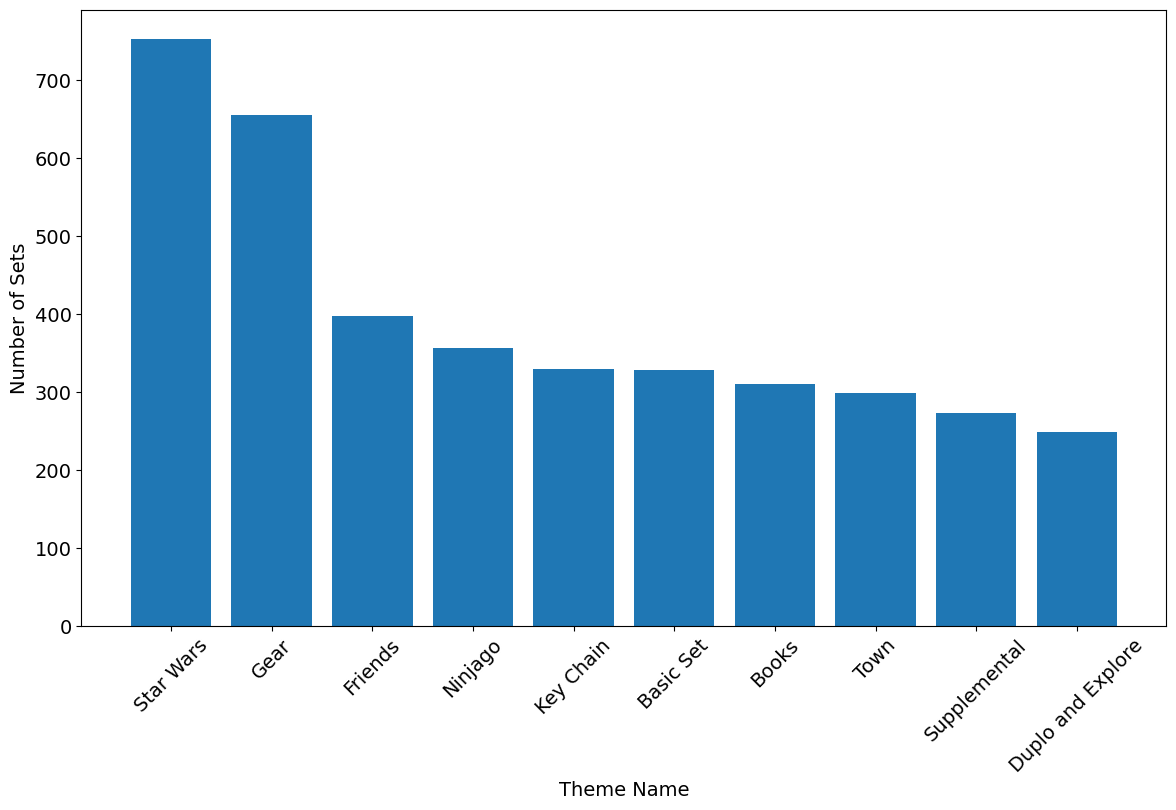

In [127]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])


# conclusion:ell, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! I guess I'm showing my age here, but it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently.